### Working with RGB and Hex masks for semantic Segmentation

Reference:

[228_semantic_segmentation_of_aerial_imagery_using_unet](https://github.com/bnsreenu/python_for_microscopists/blob/master/228_semantic_segmentation_of_aerial_imagery_using_unet/228_training_aerial_imagery.py#L35)

by Dr. Sreenivas Bhattiprolu

Dataset: [Semantic segmentation of aerial imagery](https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery)

Segmentation Model Repo: https://github.com/qubvel/segmentation_models/blob/master/segmentation_models

Dataset Mask Images Hex codes

* Building: #3C1098
* Land (unpaved area): #8429F6
* Road: #6EC1E4
* Vegetation: #FEDD3A
* Water: #E2A929
* Unlabeled: #9B9B9B

### RGB to HEX: (Hexadecimal, 16bits)

This number divided by sixteen (integer division) gives the first hexadeciaml digit (0 to F, where the letters A to F represent the numbers 10 to 15). The remainder gives the second hexadecimal digit.

Example RGB image: R=201, G=120, B=19
R=201/16 = 12 with remainder 9. Hex code for R is C9
G=120/16 = 7 with remainder 8. Hex code for G is 78
B=19/16 = 1 with remainder 3. Hex code for B is 13

Code:

    a = int('3C', 16)  # 3C with base 16. Return 60

### HEX to RGB

Example HEX image: `#3C1098`

3C= 3*16 + 12 = 60

10= 1*16 + 0 = 16

90= 9*16 + 8 = 152

Code:

    rgb_img = '#3C1098'.lstrip('#')
    rgb_img = np.array(tuple(rgb_img[i:i+2], 16) for i in (0,2,4))

In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
Building_hex_code = '#3C1098'
Land_hex_code = '#8429F6'
Road_hex_code = '#6EC1E4'
Vegetation_hex_code = '#FEDD3A'
Water_hex_code = '#E2A929'
Unlabeled_hex_code = '#9B9B9B'

In [ ]:
! pip install -q kaggle

#from google.colab import files
# files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery

 95% 28.0M/29.6M [00:00<00:00, 40.1MB/s]
100% 29.6M/29.6M [00:00<00:00, 38.9MB/s]


In [ ]:
import os

os.makedirs('utils/', exist_ok=True)
os.chdir('utils')

! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/models.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/losses.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/vision.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/callbacks.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/utils.py

os.chdir('/content')
print("Current working directory", os.getcwd())

--2023-11-05 15:55:45--  https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15061 (15K) [text/plain]
Saving to: ‘models.py’

models.py           100%[===================>]  14.71K  --.-KB/s    in 0s      

2023-11-05 15:55:45 (78.0 MB/s) - ‘models.py’ saved [15061/15061]

--2023-11-05 15:55:45--  https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/losses.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6436 (6.3K) [text/plain]
Savi

Clone Segmentation Models repo from qubvel

In [ ]:
#! pip install -U segmentation-models
#SM_FRAMEWORK=tf.keras
#import segmentation_models as sm
'''
segmentation-models library comes with library version mismatch errors
It may this repo has not been updated for a while.
I will use my custom U-Net models
'''

'\nsegmentation-models library comes with library version mismatch errors\nIt may this repo has not been updated for a while.\nI will use my custom U-Net models\n'

In [ ]:
from utils.losses import dice_coef, jacard_coef, jacard_coef_loss, dice_coef_loss, focal_loss
from utils.models import UNet, Attention_UNet, Attention_ResUNet
from utils import vision
from utils import utils
#from segmentation_models import segmentation_models as sm

### Convert mask images with HEX code to RGB codes

In [ ]:
Building_rgb_code = utils.hexc_to_rgbc(Building_hex_code)
Land_rgb_code = utils.hexc_to_rgbc(Land_hex_code)
Road_rgb_code = utils.hexc_to_rgbc(Road_hex_code)
Vegetation_rgb_code = utils.hexc_to_rgbc(Vegetation_hex_code)
Water_rgb_code = utils.hexc_to_rgbc(Water_hex_code)
Unlabeled_rgb_code = utils.hexc_to_rgbc(Unlabeled_hex_code)

In [ ]:
categories = [Building_rgb_code, Land_rgb_code, Road_rgb_code, Vegetation_rgb_code, Water_rgb_code, Unlabeled_rgb_code]

In [ ]:
utils.unzip_data('/content/semantic-segmentation-of-aerial-imagery.zip')

Delete "semantic-segmentation-of-aerial-imagery.zip" file

In [ ]:
!rm semantic-segmentation-of-aerial-imagery.zip

In [ ]:
utils.walk_through_dir('/content/Semantic segmentation dataset')

There are 8 directories and 1 images in '/content/Semantic segmentation dataset'.
There are 2 directories and 0 images in '/content/Semantic segmentation dataset/Tile 3'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 3/masks'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 3/images'.
There are 2 directories and 0 images in '/content/Semantic segmentation dataset/Tile 8'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 8/masks'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 8/images'.
There are 2 directories and 0 images in '/content/Semantic segmentation dataset/Tile 4'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 4/masks'.
There are 0 directories and 9 images in '/content/Semantic segmentation dataset/Tile 4/images'.
There are 2 directories and 0 images in '/content/Semantic segmentation datase

In [ ]:
img_file_list = utils.get_all_img_files_in_directory('/content/Semantic segmentation dataset', ext='jpg')

In [ ]:
img_file_list[:5]

['/content/Semantic segmentation dataset/Tile 3/images/image_part_008.jpg',
 '/content/Semantic segmentation dataset/Tile 3/images/image_part_002.jpg',
 '/content/Semantic segmentation dataset/Tile 3/images/image_part_007.jpg',
 '/content/Semantic segmentation dataset/Tile 3/images/image_part_003.jpg',
 '/content/Semantic segmentation dataset/Tile 3/images/image_part_009.jpg']

In [ ]:
mask_file_list = utils.get_all_img_files_in_directory('/content/Semantic segmentation dataset', ext='png')

In [ ]:
print("Lengthe of img_file_list: ",len(img_file_list))
print("Lengthe of mask_file_list: ",len(mask_file_list))

Lengthe of img_file_list:  72
Lengthe of mask_file_list:  72


In [ ]:
sample_img_1 = utils.load_images(img_file_list[0], img_size=None, scl=False, num_channels=3)
sample_img_2 = utils.load_images(img_file_list[14], img_size=None, scl=False, num_channels=3)

print("sample_img_1.shape: ", sample_img_1.shape)
print("sample_img_2.shape: ", sample_img_2.shape)

sample_img_1.shape:  (658, 682, 3)
sample_img_2.shape:  (1480, 2149, 3)


Images in dataset are in different sizes. One of the approaches to train model with dataset containing images of different sizes is patchifying them into specified sizes.


Tile 1: 797 x 644 --> 768 x 512 --> 6

Tile 2: 509 x 544 --> 512 x 256 --> 2

Tile 3: 682 x 658 --> 512 x 512  --> 4

Tile 4: 1099 x 846 --> 1024 x 768 --> 12

Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16

Tile 6: 859 x 838 --> 768 x 768 --> 9

Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56

Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40

Total 9 images in each folder * (145 patches) = 1305

Total 1305 patches of size 256x256

In [ ]:
del sample_img_1
del sample_img_2

In [ ]:
PATCH_SIZE = 256

In [ ]:
img_list = utils.patchify_images(img_file_list, patch_size=PATCH_SIZE, scl=True)

In [ ]:
mask_list = utils.patchify_images(mask_file_list, patch_size=PATCH_SIZE, scl=False, cvt_rgb=True)

In [ ]:
print("img_list.shape: ", img_list.shape)
print("mask_list.shape: ", mask_list.shape)

img_list.shape:  (1305, 256, 256, 3)
mask_list.shape:  (1305, 256, 256, 3)


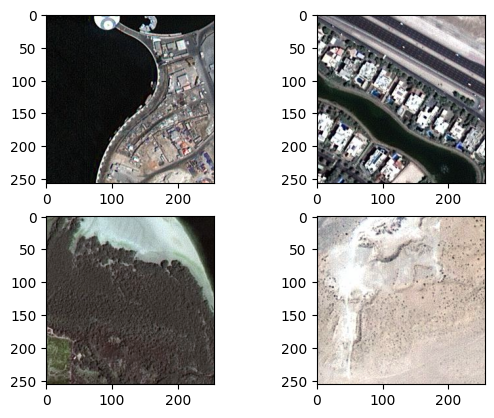

In [ ]:
plt.subplot(2,2,1)
plt.imshow(img_list[4])
plt.subplot(2,2,2)
plt.imshow(img_list[245])
plt.subplot(2,2,3)
plt.imshow(img_list[512])
plt.subplot(2,2,4)
plt.imshow(img_list[1002])
plt.show()

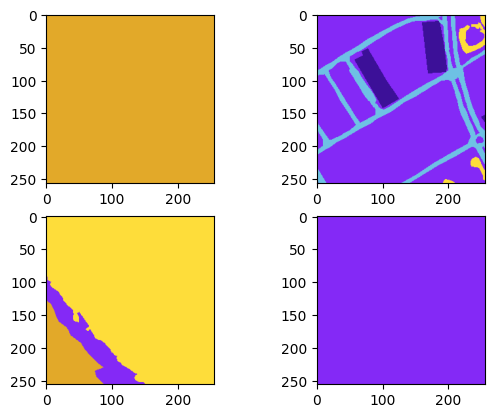

In [ ]:
plt.subplot(2,2,1)
plt.imshow(mask_list[4])
plt.subplot(2,2,2)
plt.imshow(mask_list[245])
plt.subplot(2,2,3)
plt.imshow(mask_list[512])
plt.subplot(2,2,4)
plt.imshow(mask_list[1002])
plt.show()

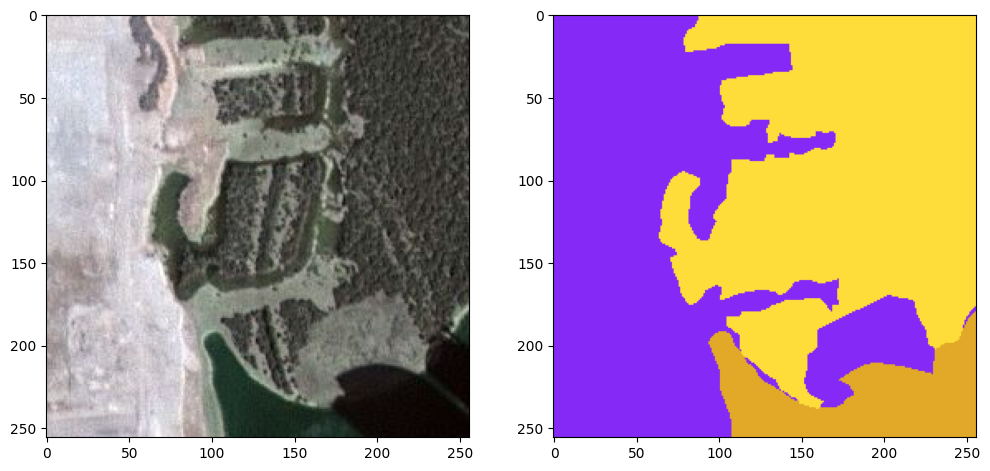

In [ ]:
import random

num = random.randint(0, len(img_list))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(img_list[num], (PATCH_SIZE, PATCH_SIZE, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_list[num], (PATCH_SIZE, PATCH_SIZE, 3)))
plt.show()

In [ ]:
label_list = utils.rgb_to_2D_label_map(mask_imgs=mask_list, categories=categories)

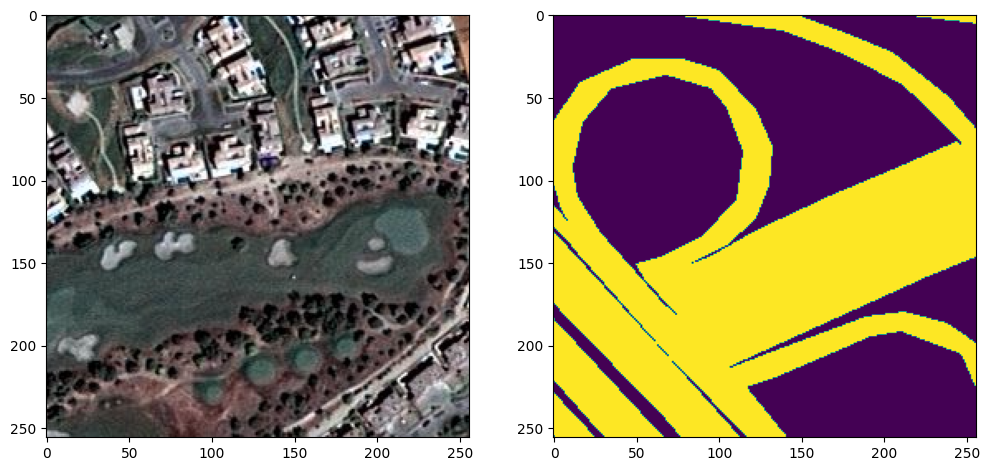

In [ ]:
import random

image_number = random.randint(0, len(img_list))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_list[image_number])
plt.subplot(122)
plt.imshow(label_list[image_number][:,:,0])
plt.show()

In [ ]:
print("Unique labels in label dataset are: ", np.unique(label_list))

Unique labels in label dataset are:  [0 1 2 3 4 5]


Convert all labels to the categorical type data

In [ ]:
TEST_SIZE = 0.2
RND_STATE = 10
INPUT_SHAPE = (img_list.shape[1], img_list.shape[2], img_list.shape[3])  # Height, width, channel

In [ ]:
from keras.utils import to_categorical

labels_cat = to_categorical(label_list, num_classes=len(np.unique(label_list)))

In [ ]:
print("img_list.shape: ", img_list.shape)
print("labels_cat.shape: ", labels_cat.shape)

img_list.shape:  (1305, 256, 256, 3)
labels_cat.shape:  (1305, 256, 256, 6)


We will use first 500 patches for training due to RAM overflow runtime error

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_list[:500], labels_cat[:500], test_size = TEST_SIZE, random_state = RND_STATE)

In [ ]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (400, 256, 256, 3)
X_test.shape:  (100, 256, 256, 3)
y_train.shape:  (400, 256, 256, 6)
y_test.shape:  (100, 256, 256, 6)


Free memory for unused arrays/variables

In [ ]:
del img_list
del label_list
del labels_cat
del mask_list
del img_file_list
del mask_file_list

In [ ]:
def unet_loss(y_true, y_pred):
  loss_dice = dice_coef_loss(y_true, y_pred)
  loss_focal = focal_loss(y_true, y_pred)
  return loss_dice + (1 * loss_focal)

In [ ]:
att_unet_model = Attention_UNet(input_shape=INPUT_SHAPE, num_classes=len(categories), verbose=1)

Model: "Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['batch_normaliza

In [ ]:
att_unet_model.compile(optimizer='adam', loss=unet_loss, metrics=['accuracy', jacard_coef])

In [ ]:
EPOCHS = 20
BATCH_SIZE = 16

In [ ]:
att_unet_model_hist = att_unet_model.fit(X_train, y_train,
                      batch_size = BATCH_SIZE,
                      verbose=1,
                      epochs=EPOCHS,
                      validation_data=(X_test, y_test),
                      shuffle=False)

Epoch 1/20
25/25 [==============================] - 97s 2s/step - loss: -0.0298 - accuracy: 0.2562 - jacard_coef: 0.1446 - val_loss: 5.7475 - val_accuracy: 0.2640 - val_jacard_coef: 0.1438
Epoch 2/20
25/25 [==============================] - 30s 1s/step - loss: -0.0635 - accuracy: 0.3431 - jacard_coef: 0.1437 - val_loss: 5.2408 - val_accuracy: 0.0104 - val_jacard_coef: 0.0063
Epoch 3/20
25/25 [==============================] - 29s 1s/step - loss: -0.0711 - accuracy: 0.3859 - jacard_coef: 0.1448 - val_loss: 7.4451 - val_accuracy: 0.0934 - val_jacard_coef: 0.1312
Epoch 4/20
25/25 [==============================] - 30s 1s/step - loss: -0.0743 - accuracy: 0.3616 - jacard_coef: 0.1455 - val_loss: 3.3818 - val_accuracy: 0.0471 - val_jacard_coef: 0.0976
Epoch 5/20
25/25 [==============================] - 30s 1s/step - loss: -0.0853 - accuracy: 0.4065 - jacard_coef: 0.1464 - val_loss: 0.2945 - val_accuracy: 0.3713 - val_jacard_coef: 0.1412
Epoch 6/20
25/25 [==============================] - 29s

In [ ]:
def plot_loss_curves(history):
  fig = plt.figure(figsize=(10,10))

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['jacard_coef']  # Typo in model compile function
  val_acc = history.history['val_jacard_coef']  # Typo in model compile function

  epochs = range(1, len(loss) + 1)

  # Training and Validation Loss Graph
  plt.subplot(2, 1, 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Dice Loss Graph
  plt.subplot(2, 1, 2)
  plt.plot(epochs, acc, 'y', label='Training Dice')
  plt.plot(epochs, val_acc, 'r', label='Validation Dice')
  plt.title('Training and validation Dice')
  plt.xlabel('Epochs')
  plt.ylabel('Dice')
  plt.legend()

  plt.show()

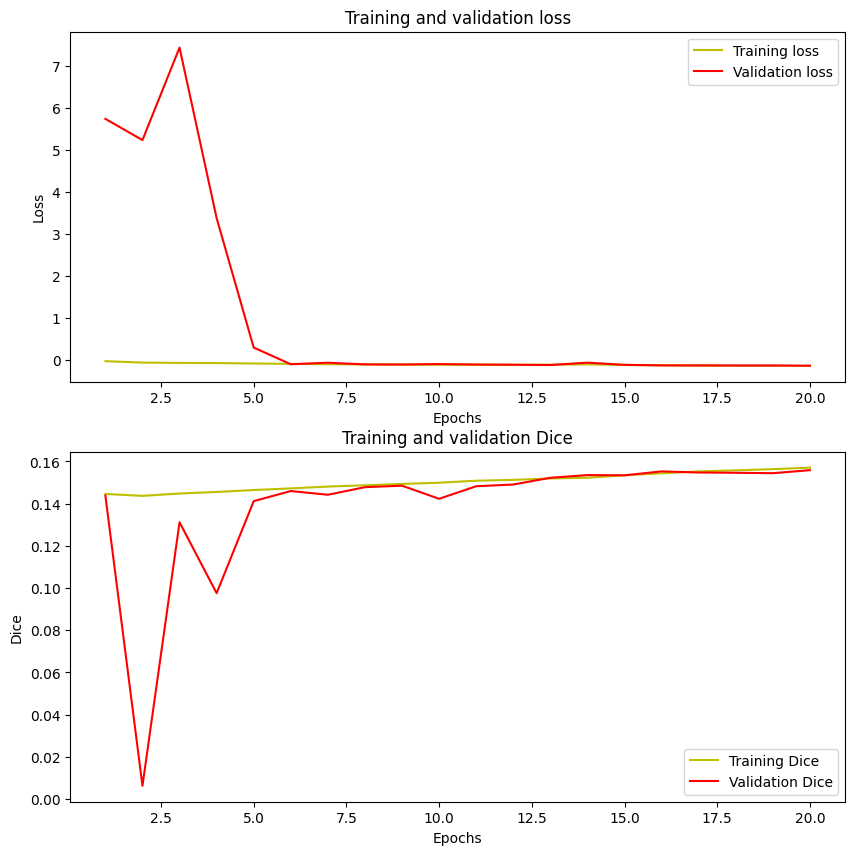

In [ ]:
plot_loss_curves(att_unet_model_hist)

Save the model

In [ ]:
# utils.save_custom_model(att_unet_model, name='att_unet_model_20epochs_aerial_dataset')
# model = tf.keras.models.load_model('/content/att_unet_model_20epochs_aerial_dataset2023_11_05_16_48_09.keras', compile=False)
# or
# att_unet_model.save('att_unet_model_20epochs_aerial_dataset2023_11_05_16_48_09.hdf5')
# model = tf.keras.models.load_model('att_unet_model_20epochs_aerial_dataset2023_11_05_16_48_09.hdf5', compile=False)

In [ ]:
TEST_IMG_IX = 4

test_img = X_test[TEST_IMG_IX]
test_img_input = np.expand_dims(test_img, 0)

In [ ]:
'''
Only one category dimension index value is 1 for each pixel in six categories
(Others are 0). So, if you have (256, 256, 6) shaped y_test array (6 categories)
argmax(arr, axis=3) only returns the dimension numbers that contain the value of
1 for the relevant index (pixel). At the end, you will have a mask list that has
not been categorized yet, again.
'''
y_test_argmax = np.argmax(y_test, axis=3)
ground_truth_mask = y_test_argmax[TEST_IMG_IX]

In [ ]:
print("y_test.shape", y_test.shape)
print("y_test_argmax.shape", y_test_argmax.shape)
print("ground_truth_mask.shape", ground_truth_mask.shape)

y_test.shape (100, 256, 256, 6)
y_test_argmax.shape (100, 256, 256)
ground_truth_mask.shape (256, 256)


In [ ]:
prediction = (att_unet_model.predict(test_img_input))
predicted_img = np.argmax(prediction, axis=3)[0,:,:]  # np.argmax(prediction, axis=3).shape: (1, 256, 256)

print("prediction.shape", prediction.shape)
print("predicted_img.shape", predicted_img.shape)

1/1 [==============================] - 0s 22ms/step
prediction.shape (1, 256, 256, 6)
predicted_img.shape (256, 256)


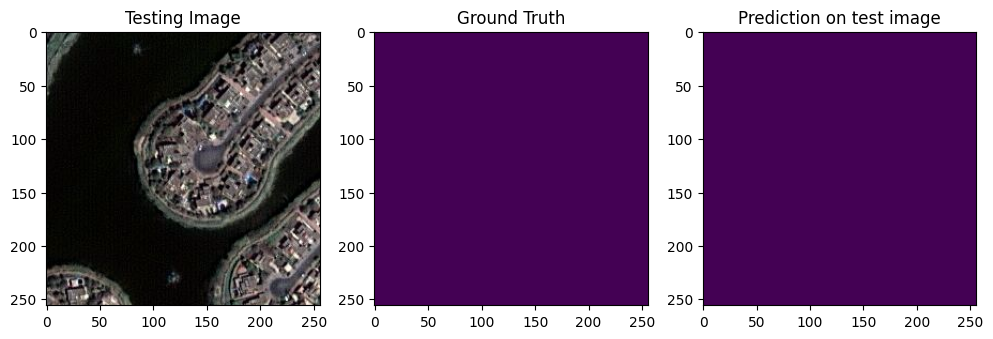

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Ground Truth')
plt.imshow(ground_truth_mask)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

Evaluation UNet model

IOU Calculation

In [ ]:
# Prediction results for all test dataset
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
from keras.metrics import MeanIoU

n_classes = 6

IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test_argmax, y_pred_argmax)

print("Mean IoU:", IOU_keras.result().numpy())

### Reference

https://github.com/bnsreenu/python_for_microscopists/blob/master/228_semantic_segmentation_of_aerial_imagery_using_unet/228_training_aerial_imagery.py#L35

https://www.youtube.com/watch?v=jvZm8REF2KY

https://www.youtube.com/watch?v=sGAwx4GMe4E